In [2]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

In [3]:
%matplotlib inline

In [4]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 16

DIRECTORY = "dataset/"
CATEGORIES = ["with_mask", "without_mask"]

In [5]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

C:\Users\ondra\miniconda3\envs\tf\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
len(data[0])

224

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
	tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
	tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.Dense(50, activation='relu'),
	tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [10]:
# # train the head of the network
# H = model.fit(x=trainX, y=trainY, epochs=10, validation_split=0.1, batch_size=1)

In [11]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

48/48 [==============================] - 3s 19ms/step
              precision    recall  f1-score   support

   with_mask       0.52      0.92      0.66       383
without_mask       0.65      0.15      0.25       384

    accuracy                           0.53       767
   macro avg       0.58      0.54      0.46       767
weighted avg       0.58      0.53      0.46       767



In [12]:
# serialize the model to disk
model.save("mask_detector.model", save_format="h5")

In [13]:
model = tf.keras.models.load_model("mask_detector.model")

In [14]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.plot(H.history["loss"], label="loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["acc"], label="acc")
plt.plot(H.history["val_acc"],label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.savefig("plot.png")

NameError: name 'H' is not defined

In [27]:
def get_label(encoded_label):
    if int(encoded_label[0]) == 1:
        return "With mask"
    else:
        return "Without mask"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


With mask


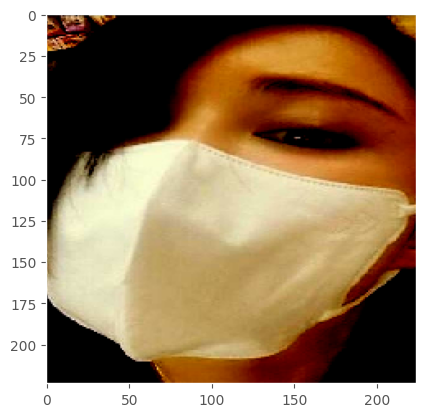

In [28]:
# max number 766
sample_number = 100
imgplot = plt.imshow(testX[sample_number])
print(get_label(testY[sample_number]))
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Without mask


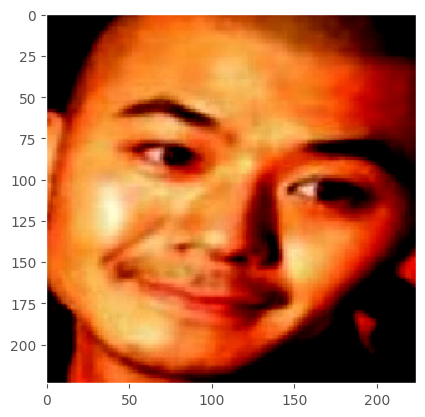

In [29]:
# max number 766
sample_number = 766
imgplot = plt.imshow(testX[sample_number])
print(get_label(testY[sample_number]))
plt.grid(False)
plt.show()